# Lab 1

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import math
import re

%matplotlib inline

In [3]:
#
# The 2017 Public Schools Machine Learning Date Set is being used throughout this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year
#
school_data = pd.read_csv('./Data/2017/machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)

# Business Understanding 

The North Carolina General Assmebly passed legislation in 2014-2014 requiring the assignment of School Performance Grades (SPG) for public and charter Schools [1].  This data set is collected in response to this legislation.  A school's SPG is calculated using 80% of the schools achievment score and 20% of the schools growth score.  The achievment score is calculated through a variety of student testing and the growth score is calculated using the EVASS School Accountablityy Growth Composite Index [2]. Schools are assigned a letter grade where A: 100-85 points, B: 84-70 points, C: 69-55 points, D: 54-40 points and F: less than 40 points.  Schools that receive grades of D or F are required by to inform parents of the school district.  In 2016, the North Carolina General Assmebly passed legislation creating the Achievment School District(ASD). This school district is run by a private organization and are run as charter schools [3].

This data set contains 334 features describing 2443 schools.  The data includes testing results used to derive the SPG described above.  It also contains school financial data, demographic information, attendence, and student behavior data measured by metrics such as susupension and expulsions. We can look into all these different types of information to see if any correlation with school performances exists, both good and bad.  Do poorly performing schools line up with any specific demographics?  Are there school financial situations that help attribute to a schools performance? Finding correlations of this data with SPG and being able to use that information in a predictive analysis algorithm may help educators identify schools before the perfomance metrics deteriorate, allowing them to intervene. The end result of all the testing and analaysis is providing all students a fair and equal opportunity at a qualtiy eduction.

[1] source: http://schools.cms.k12.nc.us/jhgunnES/Documents/School%20Performance%20Grade%20PP%20January%2014,%202015%20(1).pptx
[2] (EVASS Growth information available at http://www.ncpublicschools.org/effectiveness-model/evaas/selection/)
[3] source: https://www.ncforum.org/committee-on-low-performing-schools/

###citation: Drew J., The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

# Data Meaning Type 

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The comprehensive description of all 334 attributes can be found in the data-dictionary.pdf associated with the NC Report Card database provided by Dr. Drew. We were interested in 60 variables moving forward in the course. We visualize several attributes of interest in this report.  

<img src="files/data_meaning.jpg">

In [16]:
school_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Columns: 334 entries, student_num to unit_code
dtypes: float64(290), int64(44)
memory usage: 6.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 334 columns):
student_num                                                     float64
lea_avg_student_num                                             float64
st_avg_student_num                                              float64
00_Size                                                         float64
02_Size                                                         float64
03_Size                                                         float64
04_Size                                                         float64
05_Size                                                         float64
Math I_Size                                                     float64
lea_total_expense_num                                           f

In [15]:
#scatter_matrix(school_data)

# Data Quality

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [8]:
# to find the missing values if any: there is no missing values in our dataset to worry about.
#Print out all the missing value rows
pd.set_option('display.max_rows', 10000)

print('\r\n**The Remaining Missing Values Below will be set to Zero!**')

#Check for Missing values 
missing_values = school_data.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 
missing_values



**The Remaining Missing Values Below will be set to Zero!**


Empty DataFrame
Columns: [Variable Name, Number Missing Values]
Index: []

# Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

In [6]:
school_data.describe().transpose()

count           mean            std  \
student_num                      2443.0     584.173966     386.933479   
lea_avg_student_num              2443.0     584.245600     271.986506   
st_avg_student_num               2443.0     586.074089     150.150219   
00_Size                          2443.0       9.969709       9.588669   
02_Size                          2443.0      10.153090       9.756678   
03_Size                          2443.0      10.067131       9.756138   
04_Size                          2443.0      11.209578      10.842040   
05_Size                          2443.0      11.152272      11.173440   
Math I_Size                      2443.0       8.808023      11.225975   
lea_total_expense_num            2443.0    9337.465980    1014.397854   
lea_salary_expense_pct           2443.0       0.834615       0.024518   
lea_services_expense_pct         2443.0       0.079380       0.015031   
lea_supplies_expense_pct         2443.0       0.076526       0.015094   
lea_instruct_equip_exp_pct       2443.0       0.009479       0.006666   
lea_federal_perpupil_num         2443.0    1073.358064     309.669233   
lea_local_perpupil_num           2443.0    2150.277159     739.825389   
lea_state_perpupil_num           2443.0    6113.830757     753.951151   
SPG Score                        2443.0      60.911584      19.573094   
Reading SPG Score                2443.0      44.893573      28.271356   
EVAAS Growth Score               2443.0      73.093287      21.174384   
Science Score                    2443.0      50.405239      34.635618   
NC Math 1 Score                  2443.0      31.196070      41.041623   
EOG/EOCSubjects_CACR_All         2443.0      45.477569      18.760985   
EOGGr3_CACR_All                  2443.0      25.675440      26.534793   
EOGGr4_CACR_All                  2443.0      24.560172      25.792999   
EOGGr5_CACR_All                  2443.0      26.543226      27.710494   
EOCMathI_CACR_Female             2443.0      25.384691      37.036487   
EOCMathI_CACR_Male               2443.0      24.106795      36.664275   
EOCMathI_CACR_AmericanIndian     2443.0       0.366721       4.379259   
EOCSubjects_CACR_AmericanIndian  2443.0       0.841220       6.452360   
...                                 ...            ...            ...   
esea_status_P                    2443.0       0.028653       0.166864   
Grad_project_status_Y            2443.0       0.075727       0.264614   
SBE District_Northeast           2443.0       0.066721       0.249590   
SBE District_Northwest           2443.0       0.076955       0.266574   
SBE District_Piedmont-Triad      2443.0       0.174785       0.379861   
SBE District_Sandhills           2443.0       0.107655       0.310007   
SBE District_Southeast           2443.0       0.096193       0.294916   
SBE District_Southwest           2443.0       0.198117       0.398662   
SBE District_Western             2443.0       0.071224       0.257251   
SPG Grade_A+NG                   2443.0       0.031109       0.173649   
SPG Grade_B                      2443.0       0.265657       0.441773   
SPG Grade_C                      2443.0       0.400737       0.490148   
SPG Grade_D                      2443.0       0.178060       0.382641   
SPG Grade_F                      2443.0       0.034793       0.183293   
SPG Grade_I                      2443.0       0.015555       0.123770   
Reading SPG Grade_B              2443.0       0.158412       0.365201   
Reading SPG Grade_C              2443.0       0.328285       0.469685   
Reading SPG Grade_D              2443.0       0.203438       0.402638   
Reading SPG Grade_F              2443.0       0.038477       0.192385   
Math SPG Grade_B                 2443.0       0.177241       0.381951   
Math SPG Grade_C                 2443.0       0.286124       0.452040   
Math SPG Grade_D                 2443.0       0.189930       0.392326   
Math SPG Grade_F                 2443.0       0.063856       0.244546   
EVAAS Growth Status

In [5]:
school_data_simple = school_data[['SPG Score','lea_avg_student_num','student_num']]
school_data_simple.describe()

SPG Score  lea_avg_student_num  student_num
count  2443.000000          2443.000000  2443.000000
mean     60.911584           584.245600   584.173966
std      19.573094           271.986506   386.933479
min       0.000000             5.000000     5.000000
25%      53.000000           427.500000   337.500000
50%      64.000000           529.000000   512.000000
75%      73.000000           683.000000   725.000000
max     100.000000          1852.000000  2974.000000

### Simple Statistics on SPG Score, and number of students in schools
The table above show us statistics for SPG.  Understanding the mean SPG score is 60.91, which is in the lower part of the "C" range.  The median SPG score
is 64.00, also in "C" range.  It is surprising to see a maximum SPG score of 100 as this indicates perfect scoring for some individual school.  Also the minimum score of 0 mean total failure in testing.  Both of these data points require more investigation to see if see if there are any errors in the data and where these points come from.

In [7]:
# Find the schools whose SPG =1 00
school_SPG_100 =(school_data.loc[school_data['SPG Score'] == 100])
print (school_SPG_100['unit_code'])

371    190501
Name: unit_code, dtype: int64


The school with unit code 190501 has a perfect SPG. The data in this field should be examined for errors or to understand why they received a perfect SPG.

In [8]:
# Find the schools whose SPG = 0  Purposely coded different than above to show various coding techniques
school_SPG_0 =(school_data['unit_code'].loc[school_data['SPG Score'] == 0])
print (school_SPG_0)

24       10378
51       40305
74       60334
77       70302
79       70310
115     100308
131     110303
169     110432
184     120308
199     120352
221     130317
238     130336
259     140306
260     140307
291     160309
317     180323
356     190310
379     200322
389     210316
401     230330
414     230359
442     241312
444     241320
470     260302
498     260363
509     260374
530     260412
531     260413
544     260432
550     260449
         ...  
1685    681328
1690    681338
1694    690324
1697    700310
1723    720304
1756    740360
1773    740406
1822    770312
1827    770342
1899    790392
1903    800308
1952    810386
1976    821316
1981    830316
2010    840370
2016    850324
2052    862308
2064    880320
2109    900365
2122    900392
2135    910368
2151    920324
2202    920438
2247    920508
2258    920528
2349    960332
2366    960390
2369    960488
2394    980306
2433    990340
Name: unit_code, Length: 130, dtype: int64


The list above shows 130 schools with SPG = 0.  This is more problematic than the single school whose SPG = 100.  Nonetheless we need to understand why 130 schools had an SPG = 0 and requires future investigation.

In [9]:
school_data_finance = school_data[['lea_total_expense_num','lea_salary_expense_pct',
                                  'lea_services_expense_pct', 'lea_supplies_expense_pct',
                                  'lea_instruct_equip_exp_pct']]
school_data_finance.describe()

lea_total_expense_num  lea_salary_expense_pct  \
count            2443.000000             2443.000000   
mean             9337.465980                0.834615   
std              1014.397854                0.024518   
min              8150.840000                0.761000   
25%              8731.670000                0.816000   
50%              9008.240000                0.835000   
75%              9740.490000                0.852000   
max             17718.540000                0.878000   

       lea_services_expense_pct  lea_supplies_expense_pct  \
count               2443.000000               2443.000000   
mean                   0.079380                  0.076526   
std                    0.015031                  0.015094   
min                    0.052000                  0.028000   
25%                    0.069000                  0.069000   
50%                    0.079000                  0.078000   
75%                    0.085000                  0.091000   
max                    0.148000                  0.117000   

       lea_instruct_equip_exp_pct  
count                 2443.000000  
mean                     0.009479  
std                      0.006666  
min                      0.001000  
25%                      0.006000  
50%                      0.009000  
75%                      0.012000  
max                      0.045000

Looking at the expenses, the LEA with largest number of expenses is 90% higher than the mean for all LEA's in the state.  All other quantiles are closer to the mean, indicating a good chance this in outlier.  We will look for this school to see if there are errors in the data and consider how to handle this.

In [ ]:
demog_male_cols = [col for col in school_data.columns if "Male" in col]
demog_female_cols = [col for col in school_data.columns if "male" in col]
school_data_demog_male = school_data[np.intersect1d(school_data.columns, demog_male_cols)]
school_data_demog_female = school_data[np.intersect1d(school_data.columns, demog_female_cols)]
school_data_demog_all = pd.concat([school_data_demog_female, school_data_demog_male], axis=1)
school_data_demog = school_data_demog_all.filter(regex='^(?!(EOC|Two).*?)') 

school_data_demog.describe()

The above table shows actual quantile breakdown by minority demographics.  It is interesting to note there is at least one LEA that has 0 minorities and at least one where the entire male population is made up of minorities.  Identifying these LEA's may provide some information.

# Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Correlation matrix heatmap: ---add description.  

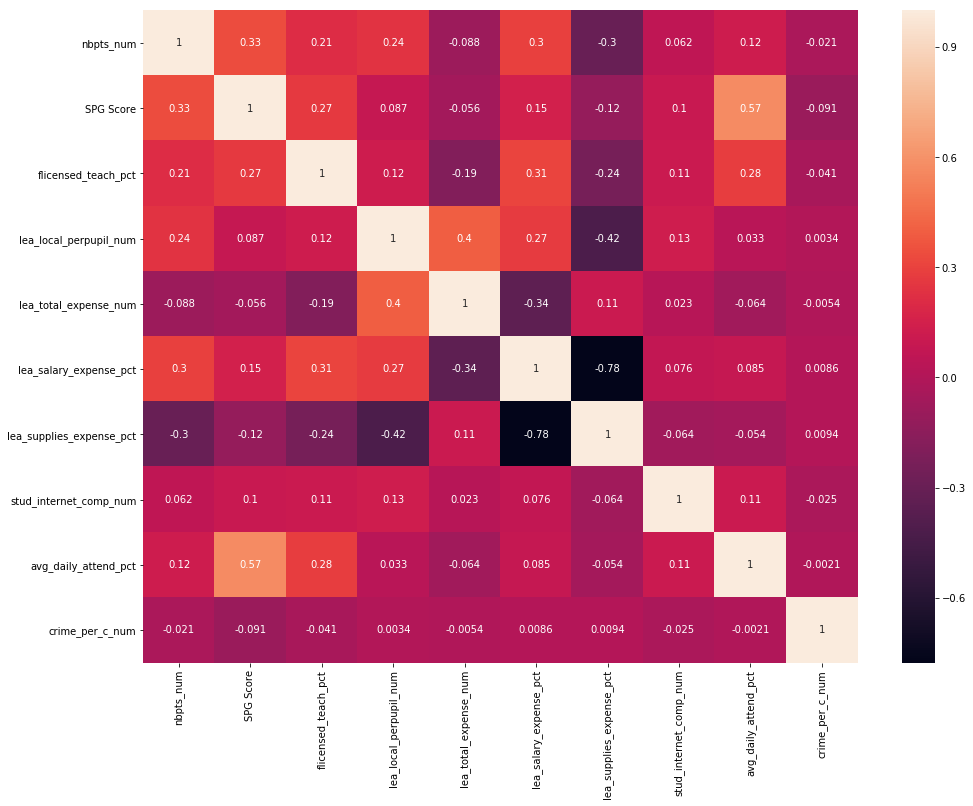

In [10]:
df_heat = school_data[['nbpts_num','SPG Score', 'flicensed_teach_pct',#school nad teacher characters
                    'lea_local_perpupil_num','lea_total_expense_num','lea_salary_expense_pct', #funding
                    'lea_supplies_expense_pct','stud_internet_comp_num',#funding
                    'avg_daily_attend_pct','crime_per_c_num', ]] #environment
df_heat_corr = df_heat.corr()

plt.figure(figsize = (16,12))
sns.heatmap(df_heat_corr,annot=True)

In [11]:
def prefixsearch(search_string, missing_value ,start_of_search_string,end_of_search_string):
    if re.search(end_of_search_string, search_string):
        return re.search('('+ start_of_search_string +'\S*)(?='+ end_of_search_string +')',search_string).group(0)
    else:
        return missing_value



In [12]:
teacher_temp_col = [col for col in school_data.columns if 'tchyrs' in col]
teacher_columns = school_data[teacher_temp_col].melt(var_name='col',value_name='values')

teacher_columns['year'] = teacher_columns['col'].apply(lambda name: re.search('(?<=tchyrs_)\S*(?=_)',name).group(0))
teacher_columns['region'] = teacher_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_tch'))



C:\Users\mtool\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


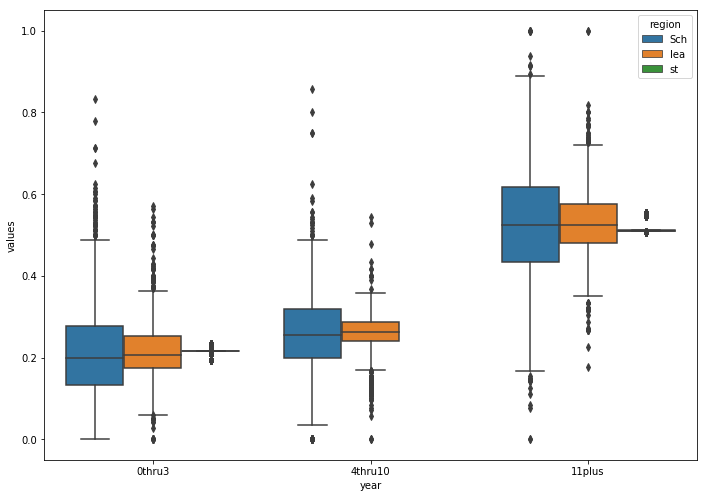

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=teacher_columns,x='year', y='values', hue='region')

# Makeup of teachers in classrooms
In the graph above we are looking at the percentage of teachers that makeup a classroom based on their years of tenure.

In [14]:
sex_temp_col = school_data.filter(regex=('[Mm]alePct')).columns
sex_teacher_columns = school_data[sex_temp_col].melt(var_name='col',value_name='Values')

sex_teacher_columns['Race'] = sex_teacher_columns['col'].apply(lambda name: prefixsearch(name, "", '^','Male|Female'))
sex_teacher_columns['Sex'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')



C:\Users\mtool\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\mtool\Anaconda3\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\mtool\Anaconda3\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


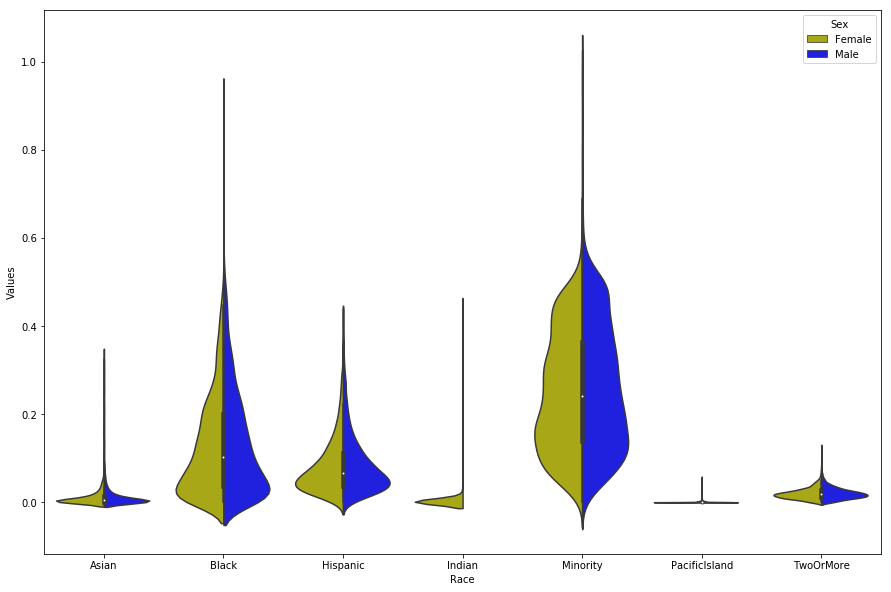

In [15]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Race',y='Values',hue='Sex',data=sex_teacher_columns,split=True,palette={"Male": "b", "Female": "y"})


# Makeup of minorities in classrooms

In the graph above we are looking at the percentage of minorities that makeup a classroom as represented with a violin plot. Each half of the violin represents the different sexual make-up of each race.


In [16]:
support_col = school_data.filter(regex=('wap|books|stud_internet')).columns
support_columns = school_data[support_col].melt(var_name='col',value_name='Values')

support_columns = support_columns[support_columns['Values']!=0]

support_columns['Values'] = support_columns['Values'].apply(lambda value: math.log(value))


#support_columns['media'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')

support_columns['region'] = support_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_wap|_books|_stud_int'))
support_columns['media'] = support_columns['col'].apply(lambda name: re.sub('lea_','',name) if re.search('lea',name) else name )

print(support_columns.sample(20))

                              col    Values region                   media
10534                     wap_num  3.871201    Sch                 wap_num
12445           wap_per_classroom  0.113329    Sch       wap_per_classroom
19332       lea_wap_per_classroom -0.400478    lea       wap_per_classroom
5011            books_per_student  2.814210    Sch       books_per_student
10580                     wap_num  3.496508    Sch                 wap_num
9915                      wap_num  4.143135    Sch                 wap_num
14623           wap_per_classroom  0.512824    Sch       wap_per_classroom
12406           wap_per_classroom -0.162519    Sch       wap_per_classroom
17799       lea_wap_per_classroom  0.277632    lea       wap_per_classroom
9767        lea_books_per_student  3.517498    lea       books_per_student
13869           wap_per_classroom  0.113329    Sch       wap_per_classroom
19008       lea_wap_per_classroom  0.708036    lea       wap_per_classroom
4448   lea_stud_internet_

C:\Users\mtool\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


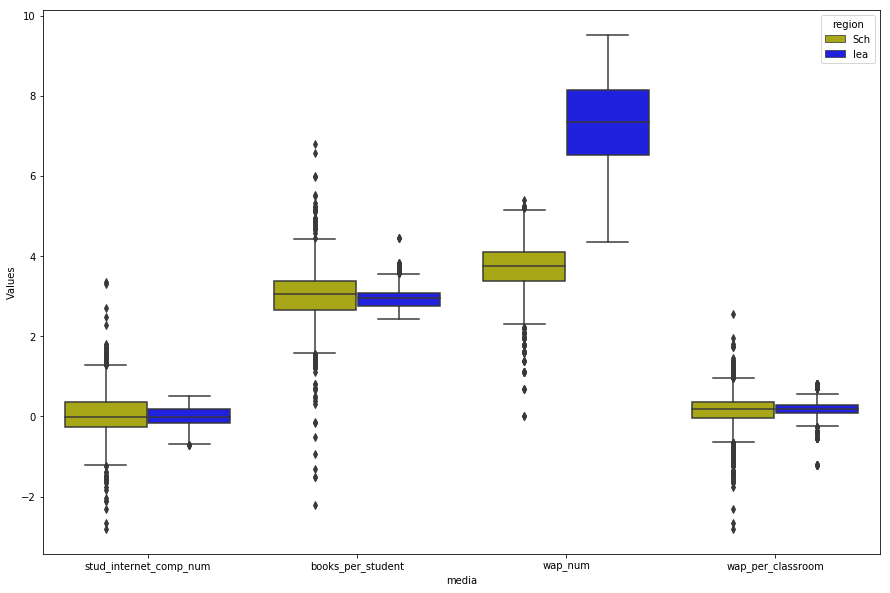

In [17]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='media',y='Values',hue='region',data=support_columns,palette={"lea": "b", "Sch": "y"})


# Media and Computer resources available
These box plots map the difference in the amount of resources that the average LEA has and the variance per school.

# Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

# Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [18]:
df=pd.DataFrame(school_data)

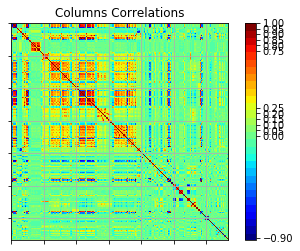

In [19]:
def correlation_matrix(school_data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
      
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    cmap=cm.get_cmap('jet',30)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    labels=['column_names',]
    plt.title('Columns Correlations')
    ax1.set_xticklabels(labels,fontsize=3)
    ax1.set_yticklabels(labels,fontsize=3)
    # Add colorbar
    fig.colorbar(cax, ticks=[-1,-.95,-.90,0,.05,.1,.15,.2,.25,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

# New Features

Are there other features that could be added to the data or created from existing features? Which ones?

In [20]:
#insert a new feature for SPG as continous values
school_data['SPG']=0
school_data['SPG'] = school_data['SPG Grade_A+NG']*6 + school_data['SPG Grade_B']*5 + school_data['SPG Grade_C']*4 + school_data['SPG Grade_D']*3 + school_data['SPG Grade_F']*2 + school_data['SPG Grade_I']*1
school_data.head()

student_num  lea_avg_student_num  st_avg_student_num  00_Size  02_Size  \
0        152.0                996.0               853.0      0.0      0.0   
1        575.0                528.0               490.0     21.0     19.0   
2        611.0                528.0               490.0     19.0     20.0   
3        742.0                706.0               629.0      0.0      0.0   
4        701.0                528.0               490.0     20.0     21.0   

   03_Size  04_Size  05_Size  Math I_Size  lea_total_expense_num ...   \
0      0.0      0.0      0.0         21.0                8588.32 ...    
1     22.0     24.0     28.0          0.0                8588.32 ...    
2     19.0     27.0     26.0          0.0                8588.32 ...    
3      0.0      0.0      0.0         26.0                8588.32 ...    
4     22.0     24.0     23.0          0.0                8588.32 ...    

   Math SPG Grade_D  Math SPG Grade_F  EVAAS Growth Status_Met  \
0                 0                 0                        1   
1                 0                 0                        0   
2                 0                 0                        0   
3                 0                 1                        1   
4                 0                 0                        0   

   EVAAS Growth Status_NotMet  State Gap Compared_Y  Byod_Yes  \
0                           0                     0         0   
1                           0                     0         0   
2                           0                     0         0   
3                           0                     0         0   
4                           1                     0         0   

   _1_to_1_access_Yes  SRC_devices_sent_home_Yes  unit_code  SPG  
0                   1                          1      10303    0  
1                   0                          0      10304    4  
2                   0                          0      10308    4  
3                   0                          0      10310    2  
4                   0                          0      10312    4  

[5 rows x 335 columns]

# Exceptional Work

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

PCA - extracting important variables (in form of components) from a large set of variables available in a data set.

when we have so many features, that means that we are working with high dimentional data. therefore we need to reduce our data dimentions. PCA is the Dimentionality reduction techniques that is very usefull in our project. There are 334 features, and only 2443 rows in the data set. Having too many features and limited data makes Principal Component Analysis a great candidate to find a model that predicts the NC school performance grades. We only consider the quantitative columns, and we would like to choose as many components as needed to explain around 80% of the SPG. Based on the variance explained graph, we must choose at least 62 principal components to explain 80% of the SPG. Variance explained graph illustrates the necessity of having 62 components to address 80% of the SPG.

The other dimentionality reduction technique is using Random Forest Classifier.
it lists the top 40 features along with their scores.

[ 19.3   25.9   30.72  35.17  38.43  41.01  43.26  45.1   46.8   48.34
  49.67  50.97  52.21  53.36  54.46  55.5   56.5   57.43  58.33  59.21
  60.03  60.83  61.61  62.35  63.05  63.75  64.42  65.06  65.68  66.28
  66.88  67.46  68.02  68.58  69.13  69.67  70.19  70.69  71.18  71.67
  72.15  72.61  73.06  73.5   73.93  74.36  74.77  75.18  75.57  75.96
  76.34  76.71  77.07  77.43  77.78  78.12  78.46  78.79  79.12  79.44
  79.76  80.07  80.37  80.67  80.97  81.26  81.54  81.82  82.1   82.37
  82.63  82.89  83.15  83.41  83.66  83.91  84.16  84.4   84.64  84.88
  85.11  85.34  85.56  85.78  86.    86.21  86.42  86.63  86.84  87.04
  87.24  87.43  87.62  87.81  88.    88.18  88.36  88.54  88.72  88.9
  89.07  89.24  89.41  89.58  89.74  89.9   90.06  90.22  90.37  90.52
  90.67  90.82  90.96  91.1   91.24  91.38  91.52  91.65  91.78  91.91
  92.04  92.17  92.29  92.41  92.53  92.65  92.77  92.89  93.    93.11
  93.22  93.33  93.44  93.55  93.66  93.77  93.87  93.97  94.07  94.17
  94.27

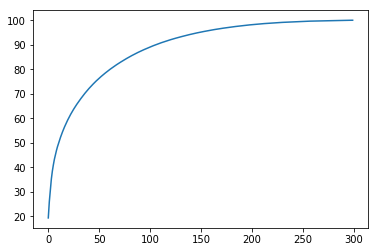

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=school_data.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=300)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)

plt.plot(var1)
pca = PCA(n_components=62)
pca.fit(X)
X1=pca.fit_transform(X)

print (X1)

#Looking at above plot I'm taking 62 variables

array([0.19296552, 0.06603664, 0.0482083 , 0.04452714, 0.03258659,
       0.02578119, 0.02245266, 0.01842167, 0.01703562, 0.01538635,
       0.0133441 , 0.0129782 , 0.01244425, 0.01150518, 0.01102487,
       0.01035526, 0.01002078, 0.00929347, 0.00897612, 0.00880325,
       0.00817376, 0.00798266, 0.00776579, 0.00738027, 0.00700577,
       0.00695019, 0.00667839, 0.00641598, 0.0062386 , 0.00603691,
       0.0059766 , 0.00580631, 0.00562224, 0.00556589, 0.00550097,
       0.00543292, 0.00516926, 0.00497381, 0.00493974, 0.00485495,
       0.00479983, 0.00460612, 0.00450777, 0.00442226, 0.00430257,
       0.00424899, 0.00410463, 0.00404085, 0.0038795 , 0.00384046,
       0.00371592, 0.00362376, 0.00354145, 0.00353638, 0.00341893,
       0.00339976, 0.0033069 , 0.00325758, 0.00322265, 0.00312662,
       0.00307174, 0.00300422])

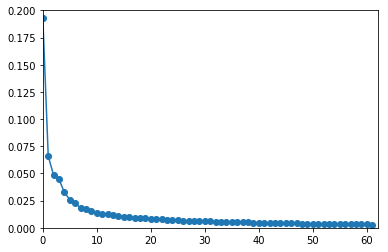

In [22]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlim(0,62)
plt.ylim(0,0.2)
pca.explained_variance_ratio_

In [23]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = school_data.iloc[:,0:40]
Y = school_data.iloc[:,-1]
names = school_data.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))


Features sorted by their score:
[(0.3038, 'SPG Score'), (0.1551, 'EOG/EOCSubjects_CACR_All'), (0.139, 'Reading SPG Score'), (0.0519, 'EVAAS Growth Score'), (0.0398, 'Science Score'), (0.036, 'EOGGr4_CACR_All'), (0.0328, 'EOCMathI_CACR_Male'), (0.0277, 'student_num'), (0.0229, 'EOGGr5_CACR_All'), (0.0203, 'lea_avg_student_num'), (0.0193, 'NC Math 1 Score'), (0.0182, 'st_avg_student_num'), (0.0132, 'EOCMathI_CACR_Female'), (0.0107, 'lea_local_perpupil_num'), (0.0107, 'EOGGr3_CACR_All'), (0.01, '00_Size'), (0.0099, 'Math I_Size'), (0.0094, 'lea_state_perpupil_num'), (0.0083, 'lea_services_expense_pct'), (0.008, 'lea_federal_perpupil_num'), (0.0077, 'lea_salary_expense_pct'), (0.0072, '02_Size'), (0.0064, '04_Size'), (0.0063, 'lea_total_expense_num'), (0.0062, 'lea_instruct_equip_exp_pct'), (0.0049, '03_Size'), (0.0044, 'lea_supplies_expense_pct'), (0.0035, 'EOG/EOCSubjects_CACR_AmericanIndian'), (0.0032, '05_Size'), (0.0017, 'EOCSubjects_CACR_AmericanIndian'), (0.0006, 'EOGMathGr3-8_CACR_